<a href="https://colab.research.google.com/github/Mukeshthakur62066/Hsepur/blob/main/Zomata_data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Zomato Project**

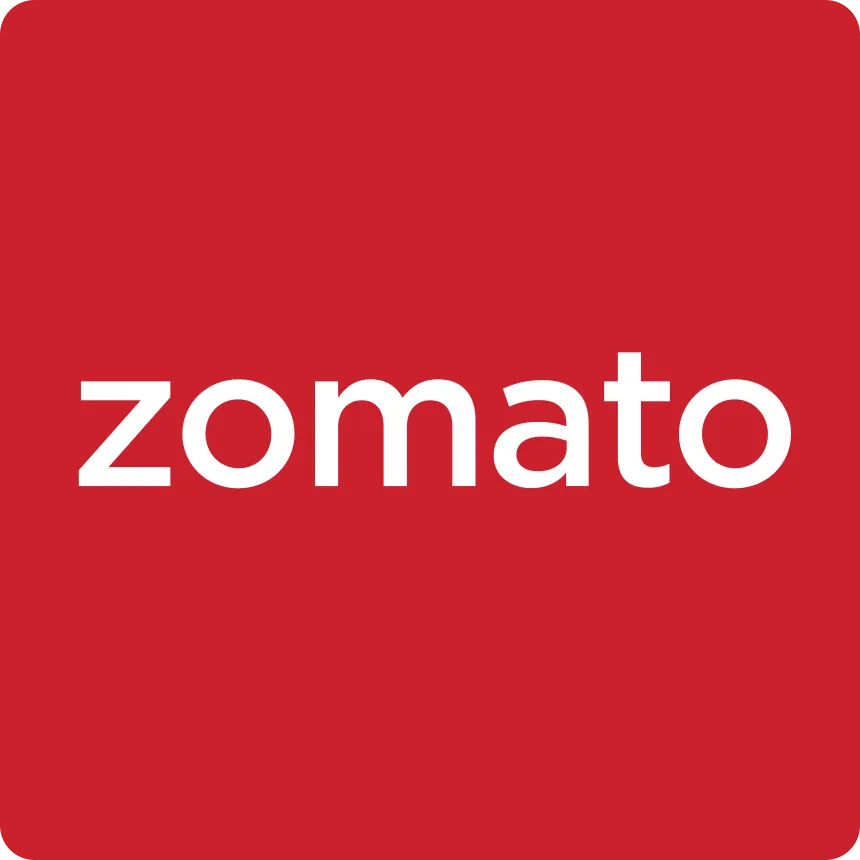

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import Data Set

In [5]:
df = pd.read_csv('https://github.com/TheiScale/YouTube-Video-Notes/raw/main/Zomato_Python_Project/Zomato%20data%20.csv')

In [6]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [7]:
df.tail()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [12]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Types of Resturant

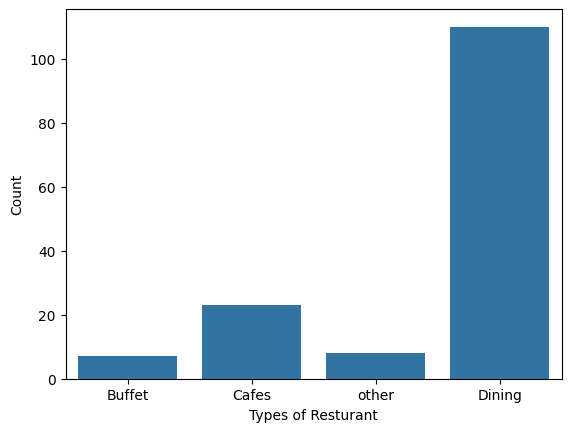

In [15]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Types of Resturant')
plt.ylabel('Count')
plt.show()

how many votes get a resturant

Text(0, 0.5, 'Votes')

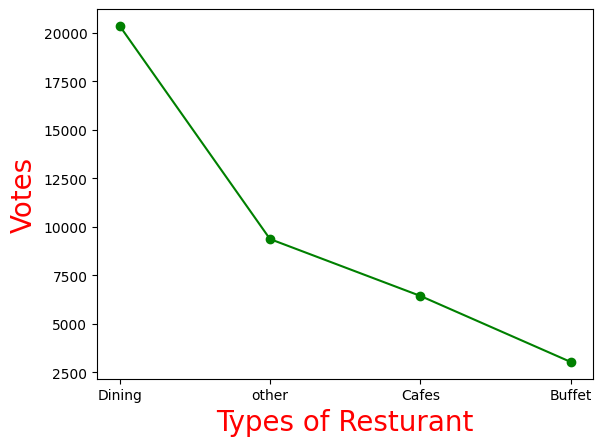

In [20]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = grouped_data.sort_values(ascending=False)
plt.plot(result, c="green", marker="o")
plt.xlabel("Types of Resturant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


rating of resturant

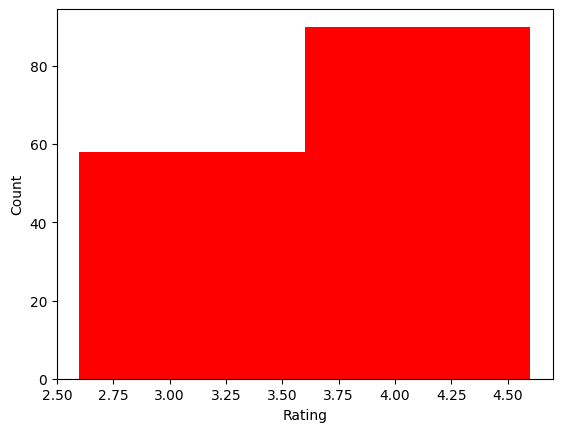

In [23]:
plt.hist(df['rate'],bins=2,color='red')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Average amount of a orders

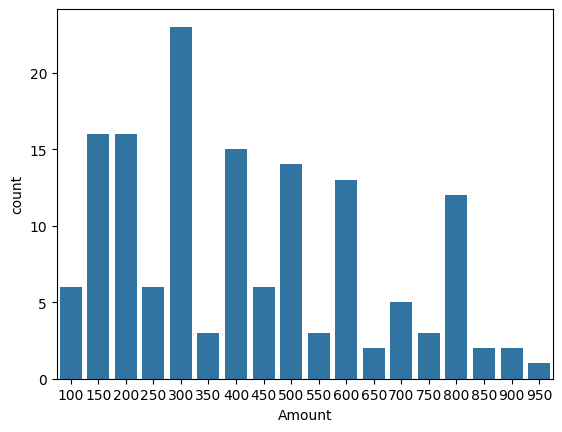

In [26]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('Amount')
plt.show()

Which mode receives maximum Ratings

<Axes: xlabel='online_order', ylabel='rate'>

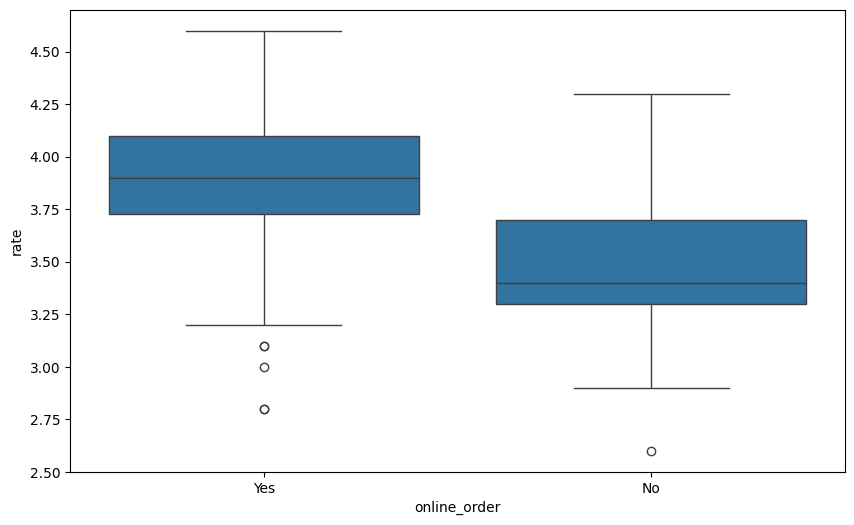

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df)

Average Rating by online order and types of resturant

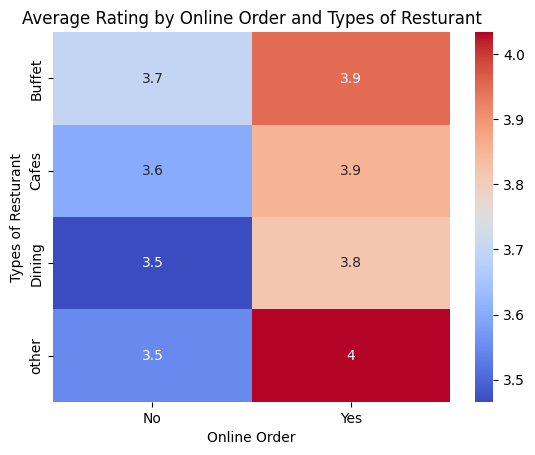

In [48]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', values='rate', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Average Rating by Online Order and Types of Resturant')
plt.xlabel('Online Order')
plt.ylabel('Types of Resturant')
plt.show()